In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pokemon = pd.read_csv('pokemon_data_science.csv')

In [2]:
pokemon.isnull().any(axis=0)

Number                False
Name                  False
Type_1                False
Type_2                 True
Total                 False
HP                    False
Attack                False
Defense               False
Sp_Attack             False
Sp_Defense            False
Speed                 False
Generation            False
Is_Legendary          False
Color                 False
Has_Gender            False
Pr_Male                True
Egg_Group_1           False
Egg_Group_2            True
Has_Mega_Evolution    False
Height_m              False
Weight_kg             False
Catch_Rate            False
Body_Style            False
dtype: bool

In [3]:
pokemon.drop(['Type_2'], inplace=True, axis=1)
pokemon.columns

Index(['Number', 'Name', 'Type_1', 'Total', 'HP', 'Attack', 'Defense',
       'Sp_Attack', 'Sp_Defense', 'Speed', 'Generation', 'Is_Legendary',
       'Color', 'Has_Gender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'Has_Mega_Evolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [4]:
grouped_by_defense = pokemon[pokemon['Defense'] > 105].groupby('Type_1')

In [5]:
defense_data = grouped_by_defense.count()['Name'].sort_values(ascending=False)
defense_data

Type_1
Rock        16
Steel       12
Ground       8
Water        6
Grass        5
Ghost        5
Fire         4
Bug          4
Psychic      3
Poison       2
Normal       2
Ice          2
Dragon       2
Dark         2
Electric     1
Name: Name, dtype: int64

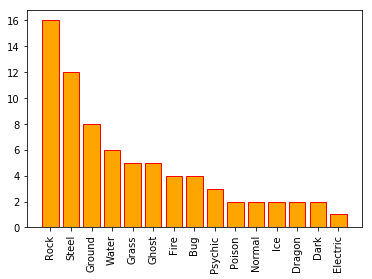

In [6]:
data_range = range(len(defense_data))
plt.bar(data_range, defense_data.data, color='orange', edgecolor='red')
plt.xticks(data_range, defense_data.index, rotation='90')
plt.show()

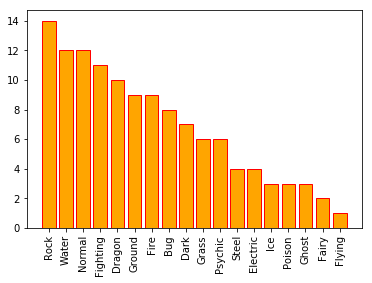

In [7]:
grouped_by_attack = pokemon[pokemon['Attack'] > 100].groupby('Type_1')
attack_data = grouped_by_attack.count()['Name'].sort_values(ascending = False)

data_range = range(len(attack_data))
plt.bar(data_range, attack_data.data, color='orange', edgecolor='red')
plt.xticks(data_range, attack_data.index, rotation='90')
plt.show()

In [8]:
grouped = pokemon.groupby('Type_1')
grouped.count()['Name'].sort_values(ascending=False)

Type_1
Water       105
Normal       93
Grass        66
Bug          63
Psychic      47
Fire         47
Rock         41
Electric     36
Ground       30
Poison       28
Dark         28
Fighting     25
Dragon       24
Ice          23
Ghost        23
Steel        22
Fairy        17
Flying        3
Name: Name, dtype: int64

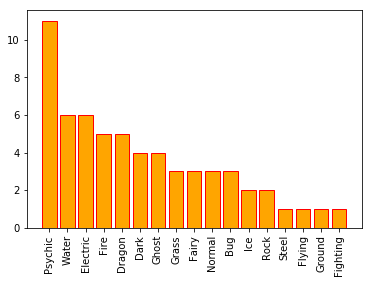

In [9]:
grouped_by_special = pokemon[pokemon['Sp_Attack'] > 110].groupby('Type_1') 
specials_data = grouped_by_special.count()['Name'].sort_values(ascending=False)
specials_data

data_range = range(len(grouped_by_special))
plt.bar(data_range, specials_data.data, color='orange', edgecolor='red')
plt.xticks(data_range, specials_data.index, rotation='90')
plt.show()

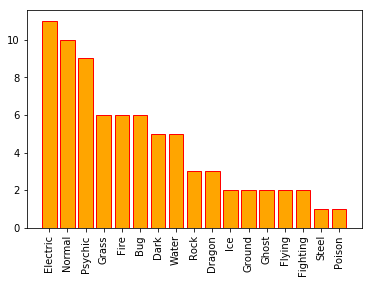

In [10]:
grouped_by_speed = pokemon[pokemon['Speed'] > 100].groupby('Type_1') 
speed_data = grouped_by_speed.count()['Name'].sort_values(ascending=False)
speed_data

data_range = range(len(grouped_by_speed))
plt.bar(data_range, speed_data.data,color='orange', edgecolor='red')
plt.xticks(data_range, speed_data.index, rotation='90')
plt.show()

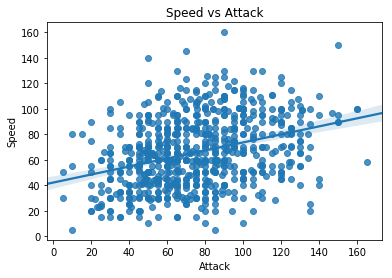

In [11]:
sns.regplot(x=pokemon['Attack'], y=pokemon['Speed'], data=pokemon)
plt.title('Speed vs Attack')
plt.show()

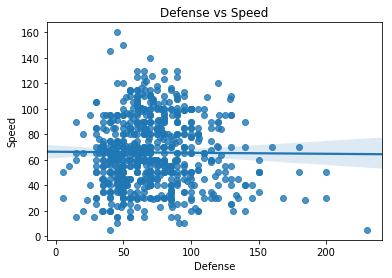

In [12]:
sns.regplot(x=pokemon['Defense'], y=pokemon['Speed'], data=pokemon)
plt.title('Defense vs Speed')
plt.show()

In [13]:
pokemon_stats = pokemon[['HP', 'Attack', 'Defense', 'Sp_Attack', 'Sp_Defense', 'Speed']]

In [14]:
pokemon_stats.corr()

,HP,Attack,Defense,Sp_Attack,Sp_Defense,Speed
HP,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031
Attack,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013
Defense,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663
Sp_Attack,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106
Sp_Defense,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487
Speed,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000


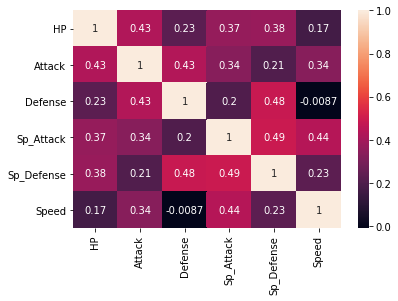

In [15]:
sns.heatmap(pokemon_stats.corr(), annot=True);

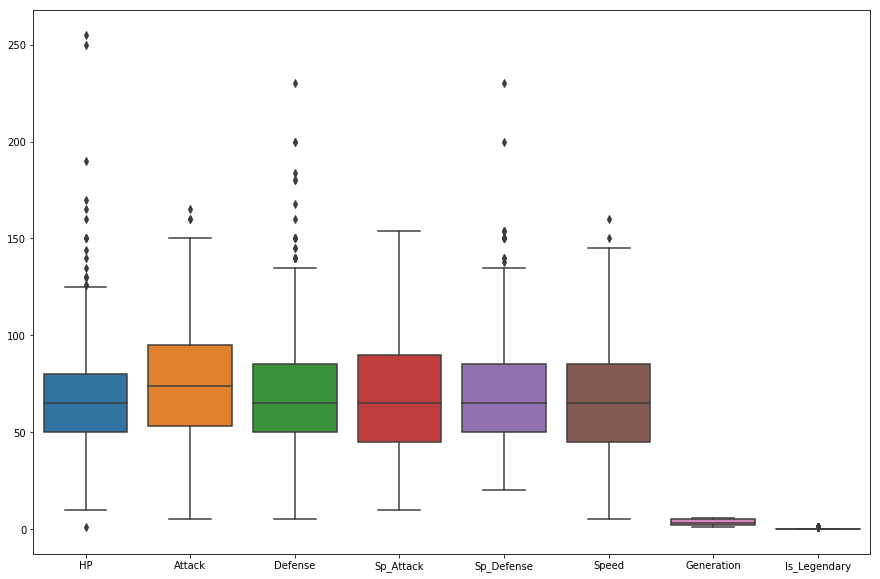

In [17]:
pokemon_set_1 = pokemon.drop(['Number', 'Total'], axis=1)
pokemon_set_1.drop(['Has_Gender', 'Has_Mega_Evolution'], inplace=True, axis=1)
pokemon_set_1.drop(['Height_m', 'Weight_kg', 'Catch_Rate', 'Pr_Male'], inplace=True, axis=1)
plt.subplots(figsize = (15,10))
sns.boxplot(data=pokemon_set_1)
plt.show()

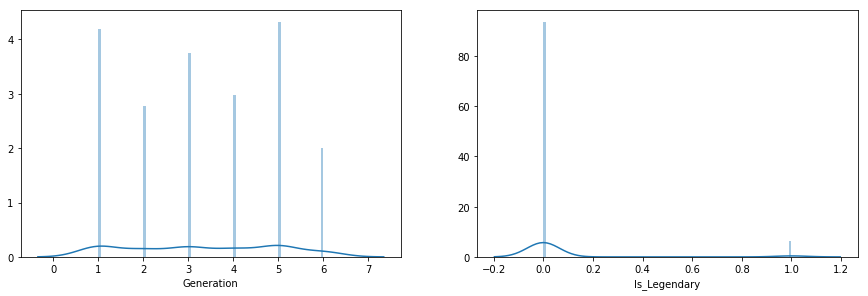

In [22]:
plt.subplots(1, 2, figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.distplot(pokemon['Generation'], bins=100)

plt.subplot(2, 2, 2)
sns.distplot(pokemon['Is_Legendary'], bins=100)

plt.show()

In [26]:
pokemon_set_2 = pokemon.groupby(['Type_1'], as_index=True).mean()
pokemon_set_2 = pokemon_set_2.drop(['Number', 'Total', 'Has_Gender', 'Has_Mega_Evolution',
                                    'Generation', 'Is_Legendary',
                                    'Height_m', 'Weight_kg', 'Catch_Rate', 'Pr_Male'], axis=1).transpose()
pokemon_set_2

Type_1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
HP,55.952381,67.178571,78.041667,59.500000,74.117647,70.24,68.595745,68.000000,61.565217,66.196970,72.400000,71.652174,76.526882,67.250000,70.617021,64.536585,64.818182,70.866667
Attack,65.222222,86.250000,102.625000,67.777778,61.529412,94.72,82.212766,71.666667,67.521739,70.909091,91.300000,70.695652,71.731183,74.678571,61.276596,88.463415,83.545455,71.047619
Defense,67.698413,67.928571,79.125000,59.083333,65.705882,64.28,64.893617,61.666667,75.956522,69.363636,82.166667,71.043478,57.795699,68.821429,65.042553,99.756098,119.409091,70.485714
Sp_Attack,54.031746,70.500000,82.458333,83.083333,78.529412,48.56,83.468085,89.000000,81.304348,74.333333,51.733333,75.695652,54.451613,60.428571,90.595745,60.048780,63.545455,71.714286
Sp_Defense,62.158730,67.500000,83.041667,67.722222,84.705882,63.68,69.468085,66.666667,76.478261,68.863636,61.266667,76.130435,62.000000,64.392857,82.382979,73.073171,79.409091,68.076190
Speed,60.063492,75.392857,76.666667,83.527778,48.588235,62.88,74.382979,96.333333,60.826087,59.893939,62.133333,61.869565,69.655914,63.571429,72.574468,51.926829,54.181818,65.009524


In [28]:
colors = ['#000000','#e6194b','#3cb44b','#ffe119','#0082c8','#f58231',
          '#911eb4','#46f0f0','#f032e6','#d2f53c','#fabebe','#008080',
          '#e6beff','#aa6e28','#fffac8','#800000','#808000','#ffd8b1',
          '#000080','#808080','#aaffc3']

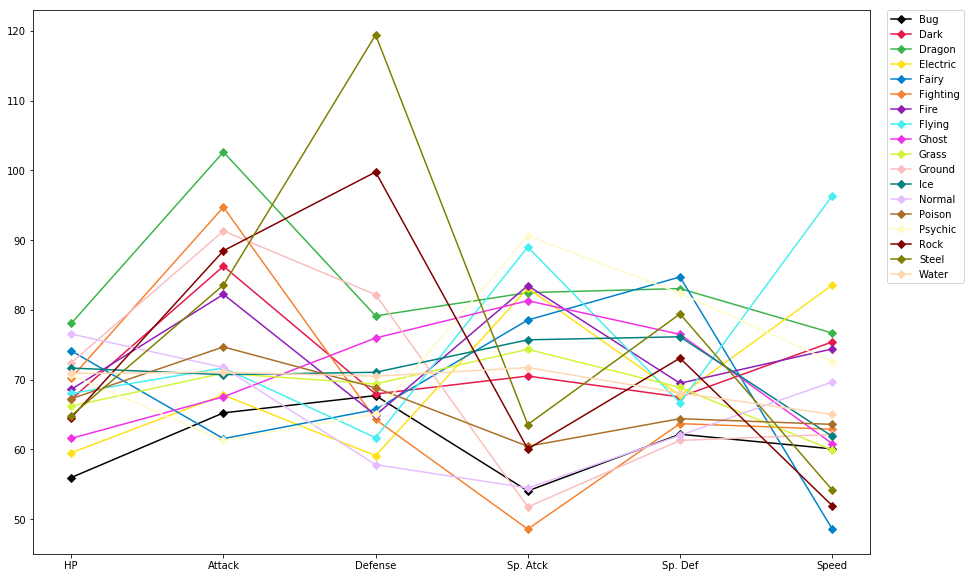

In [30]:
pokemon_set_2[pokemon_set_2.columns].plot(color=colors[:len(pokemon_set_2.columns)], marker='D')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.gcf().set_size_inches(15,10)
my_xticks = ['HP','Attack','Defense','Sp. Atck', 'Sp. Def', 'Speed']
plt.xticks([0,1,2,3,4,5], my_xticks)
plt.show()

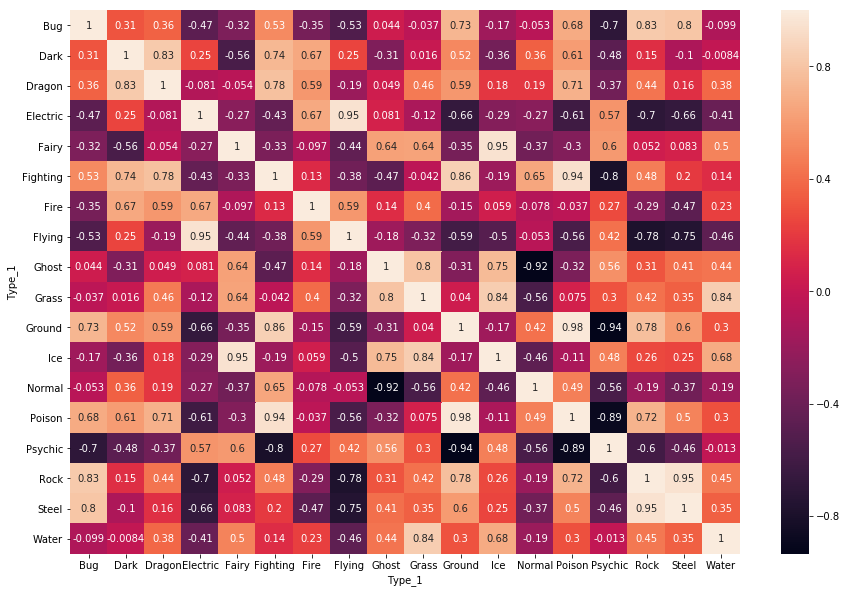

In [31]:
plt.subplots(figsize=(15,10))
sns.heatmap(pokemon_set_2.corr(), annot=True)
plt.show()

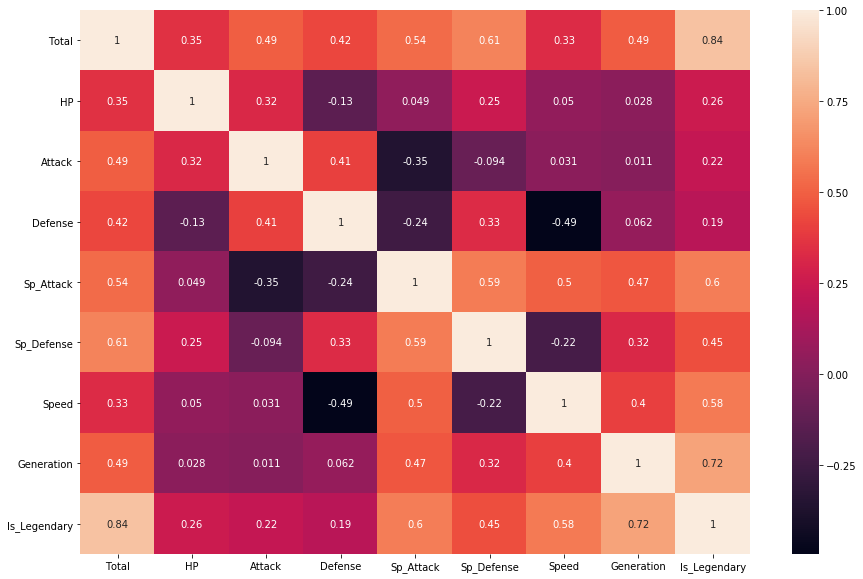

In [33]:
pokemon_set_3 = pokemon.groupby(['Type_1'], as_index=True).mean()
pokemon_set_3 = pokemon_set_3.drop(['Number', 'Has_Gender', 'Has_Mega_Evolution',
                                    'Height_m', 'Weight_kg', 'Catch_Rate', 'Pr_Male'], axis=1)
plt.subplots(figsize=(15,10))
sns.heatmap(pokemon_set_3.corr(), annot=True)
plt.show()

In [36]:
def relate(feature1, feature2):
    features = ['Type_1', 'population', feature1, feature2]

    data = pd.DataFrame(columns=features)
    data[features[0]] = pokemon.groupby(['Type_1']).mean().index.tolist()
    data[features[1]] = pokemon.groupby(['Type_1'])['Number'].count().tolist()
    data[features[2]] = pokemon.groupby(['Type_1'])[features[2]].mean().tolist()
    data[features[3]] = pokemon.groupby(['Type_1'])[features[3]].mean().tolist()
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15,10)

    for idx,val in data.iterrows():
        ax.scatter(x=val[feature1], y=val[feature2],
                   c = colors[idx], label=val['Type_1'],
                   s=val['population'] * 20)

    lgnd = plt.legend(data['Type_1'], bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)

    for x in range(len(data.index)):
        lgnd.legendHandles[x]._sizes = [100]

    plt.show()

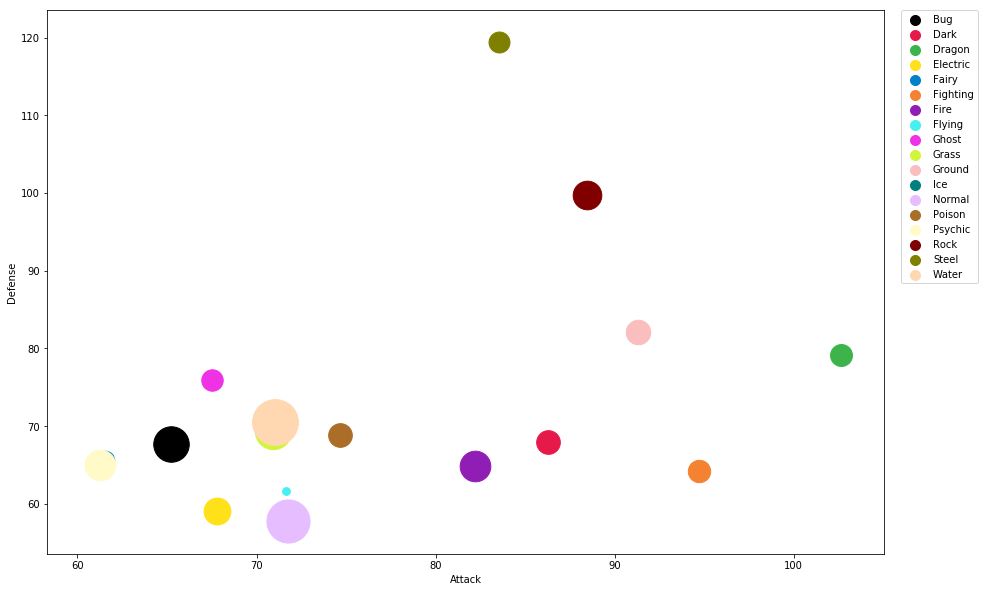

In [38]:
relate('Attack', 'Defense')

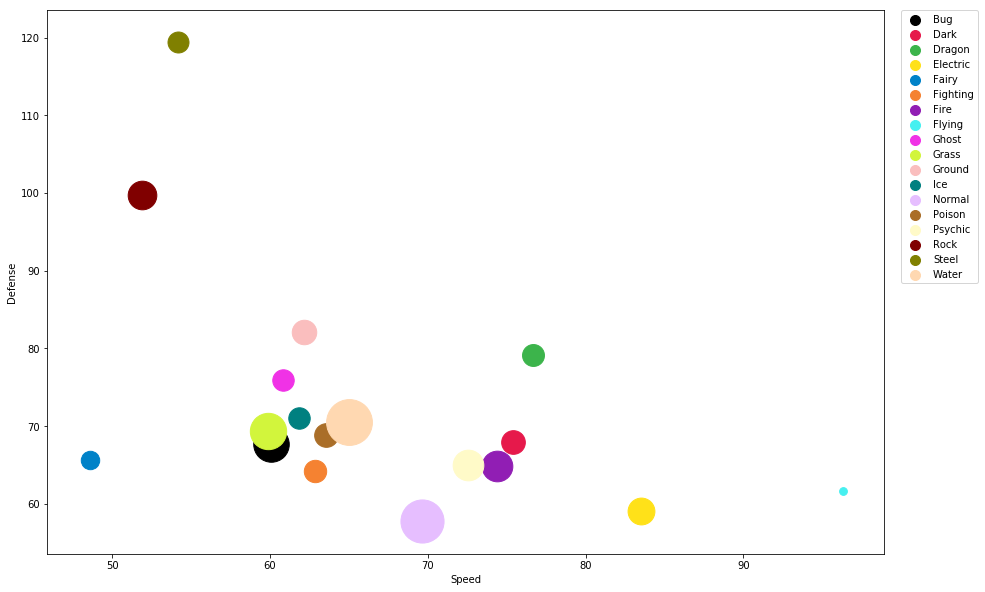

In [41]:
relate('Speed', 'Defense')

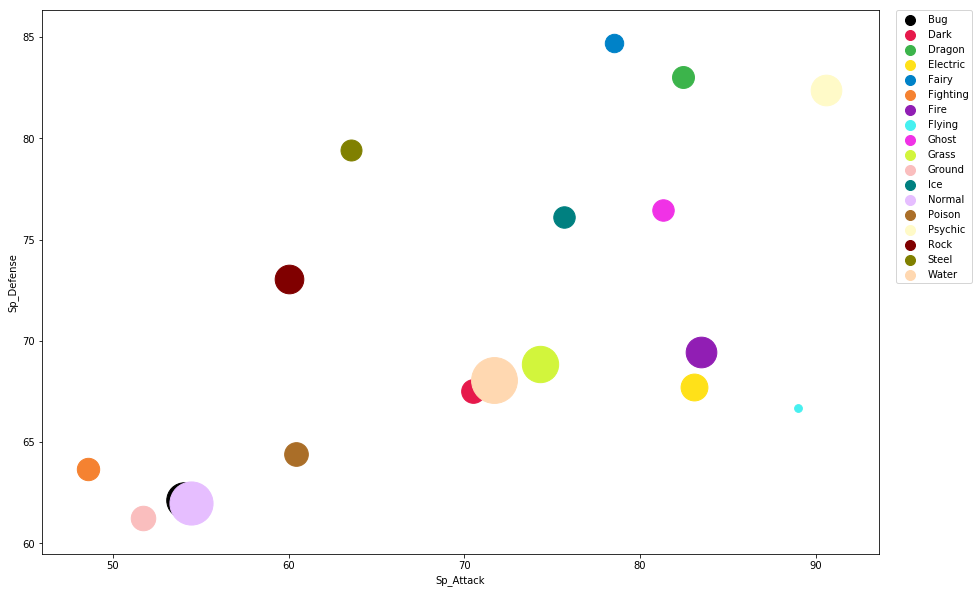

In [42]:
relate('Sp_Attack', 'Sp_Defense')